In [1]:
from sklearn.cluster import KMeans
import keras
from keras.layers import Input, Conv1D,Activation,MaxPooling1D,Dense,Flatten,UpSampling1D
from keras.layers.normalization import BatchNormalization
from keras.models import Model,load_model
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
from mpl_toolkits.mplot3d import axes3d

Using TensorFlow backend.


In [54]:
data_norm= np.load('watch_norm_128.npy')
data= np.load('watch.npy')
timeStep=10
indexs = np.arange(0,len(data),timeStep)
data_norm=data_norm[indexs]
data=data[indexs]
data_norm.shape
data.shape

(1120, 128, 26)

In [20]:
data_norm= np.load('watch_norm_128_4_25_.npy')
data= np.load('watch_4_25.npy')
timeStep=1
indexs = np.arange(0,len(data),timeStep)
data_norm=data_norm[indexs]
data=data[indexs]
data_norm.shape
data.shape

(2873, 32, 18)

In [58]:

fullModel=load_model('fullModel.h5')
fullModelEncoder=Model(inputs=fullModel.input,outputs = fullModel.layers[17].output)
full_LV = fullModelEncoder.predict(data_norm).reshape((len(data_norm),-1))

In [217]:
lstmModel=load_model('lstmModel.h5')
lstmModelEncoder=Model(inputs=lstmModel.input,outputs=lstmModel.layers[1].output)
full_LV=lstmModelEncoder.predict(data_norm).reshape((len(data_norm),-1))
full_LV.shape

(1120, 768)

In [24]:
full_LV=np.load('full_LV_LSTM_128Unit.npy')
full_LV.shape

(20941, 256)

In [26]:
pca=PCA(n_components=2)
pcaComponents=pca.fit_transform(full_LV[:,:])
pca.explained_variance_ratio_  

array([0.29074538, 0.12782526], dtype=float32)

In [27]:
pca2 = PCA(0.95)
pca2.fit(full_LV[:,:])
pcaComponents2=pca2.transform(full_LV[:,:])
pca2.explained_variance_ratio_ 

array([0.29074568, 0.12782528, 0.09202336, 0.07842709, 0.05461815,
       0.04918443, 0.04093001, 0.02282101, 0.02146845, 0.01933417,
       0.01845135, 0.0163702 , 0.0148203 , 0.01337524, 0.01169838,
       0.01043346, 0.00982149, 0.00938543, 0.00837971, 0.00684575,
       0.00628282, 0.0055593 , 0.00540482, 0.00455027, 0.00429008,
       0.00418889, 0.00352644], dtype=float32)

In [13]:
y_kmeans=np.loadtxt('kmeans_4_29_cluster_128Units_3.csv')[32:]

[0.29074532 0.1278254  0.09202362]


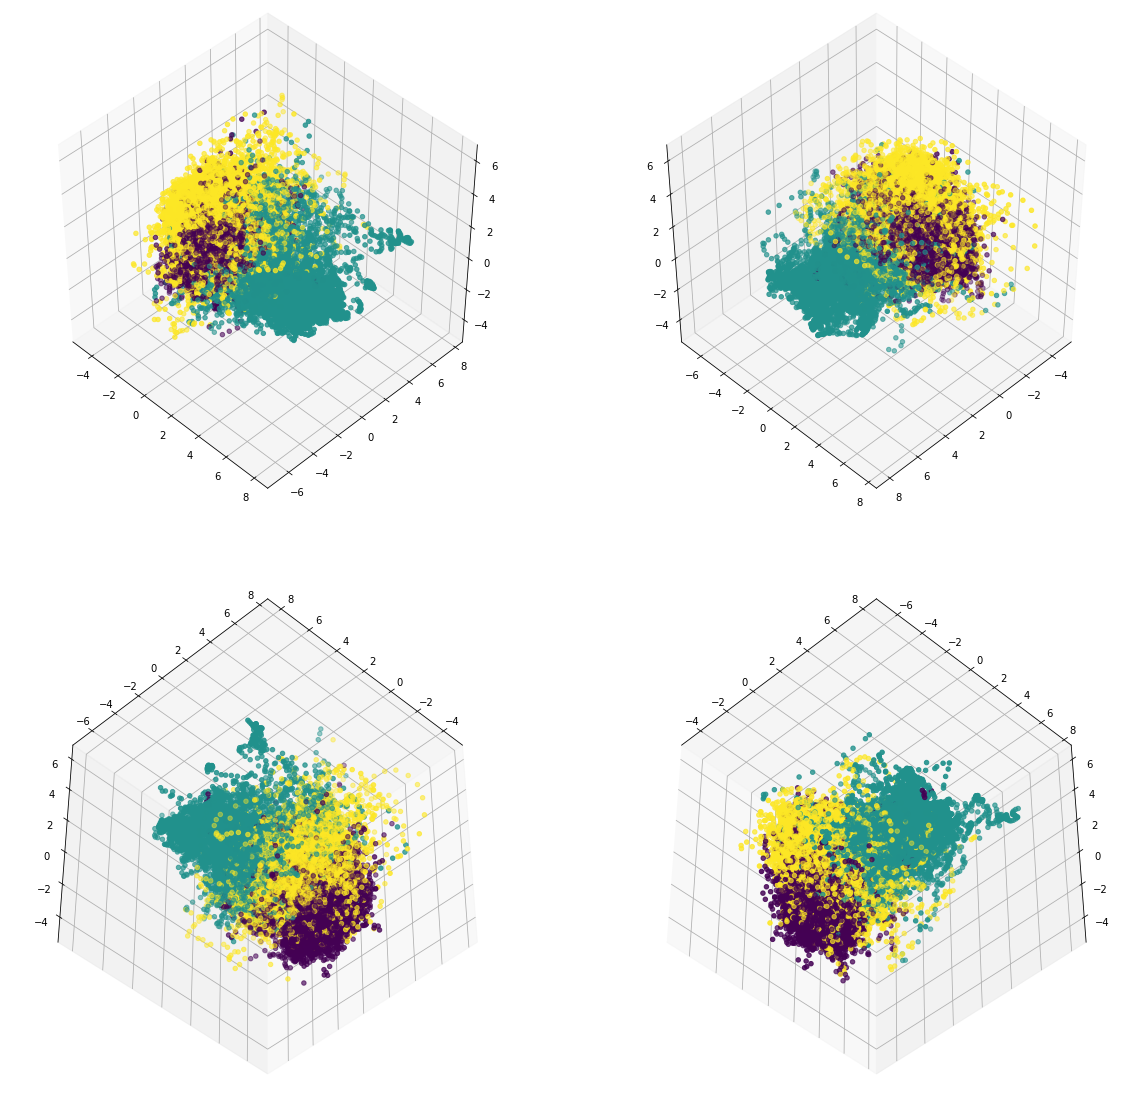

In [25]:
full_LV=np.load('full_LV_LSTM_128Unit.npy')
n_clusters=3
#index=np.arange(0,len(full_LV))
#index = np.append(index,np.arange(96*4,96*6))
kmean=KMeans(n_clusters=n_clusters,max_iter=300000)
kmean.fit(full_LV[:,:])
#y_kmeans=kmean.predict(full_LV[:,:])
pca=PCA(n_components=3)
pcaComponents=pca.fit_transform(full_LV[:,:])
print(pca.explained_variance_ratio_  )
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(pcaComponents[:,0],pcaComponents[:,1],pcaComponents[:,2],c=y_kmeans)
ax.view_init(45, -45)
ax = fig.add_subplot(222, projection='3d')
ax.scatter(pcaComponents[:,0],pcaComponents[:,1],pcaComponents[:,2],c=y_kmeans)
ax.view_init(45, 45)

ax = fig.add_subplot(223, projection='3d')
ax.scatter(pcaComponents[:,0],pcaComponents[:,1],pcaComponents[:,2],c=y_kmeans)
ax.view_init(-45, 45)
ax = fig.add_subplot(224, projection='3d')
ax.scatter(pcaComponents[:,0],pcaComponents[:,1],pcaComponents[:,2],c=y_kmeans)
ax.view_init(-45, -45)

plt.show()

num of indices in cluste 0 :104
num of indices in cluste 1 :105
num of indices in cluste 2 :142


C:\Users\Guo\Anaconda3\envs\Tensorflow_cpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


num of indices in cluste 3 :129
num of indices in cluste 4 :167
num of indices in cluste 5 :107
num of indices in cluste 6 :221
num of indices in cluste 7 :145


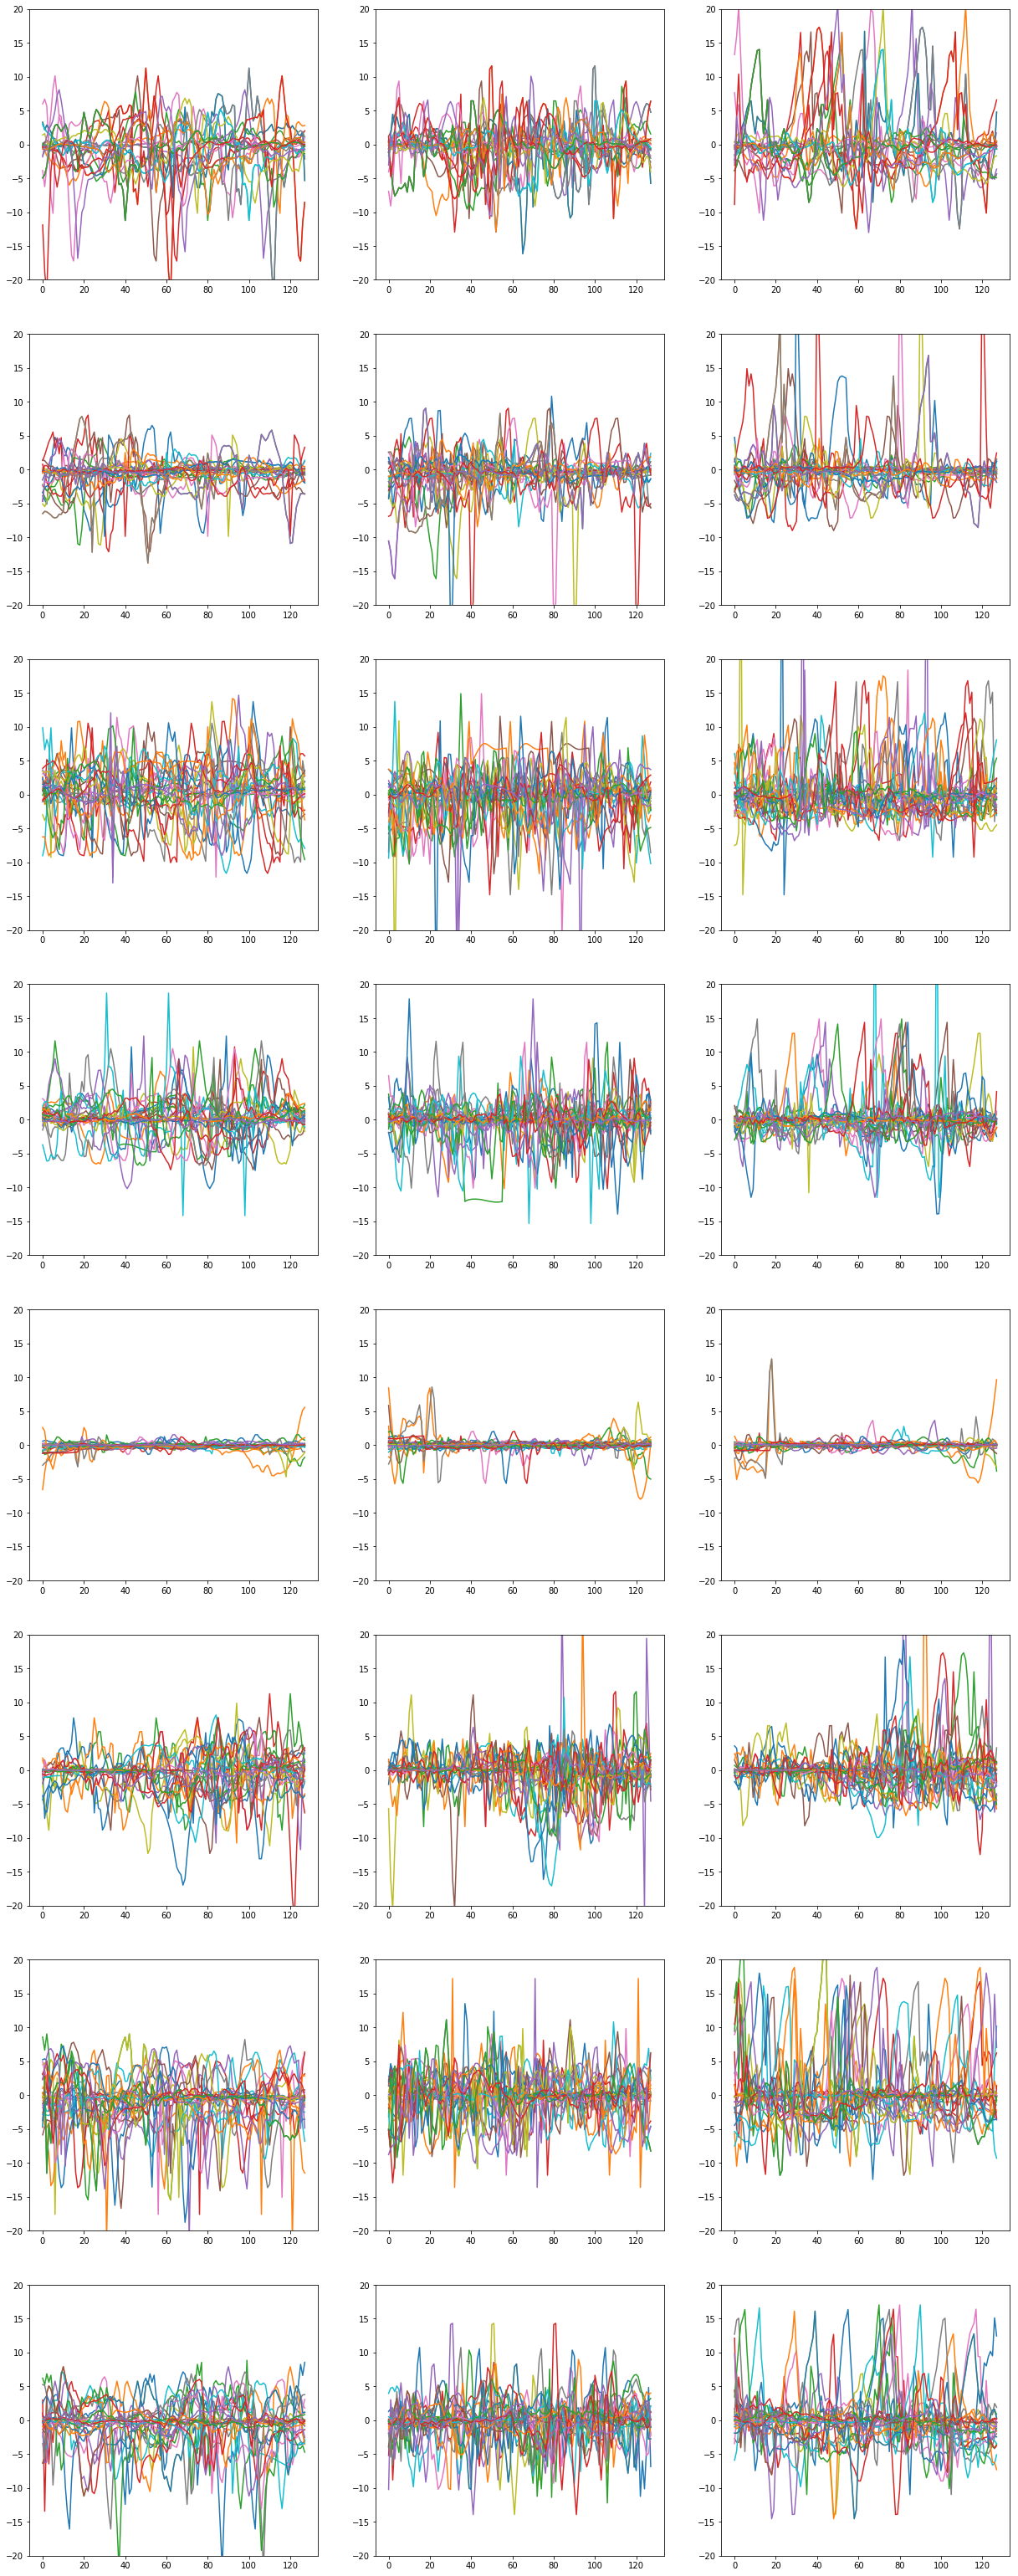

In [6]:
num_plt=25
fig=plt.figure(figsize=(21,7*n_clusters))
yrange=20

for j in range(n_clusters):
    indices = [i for i, x in enumerate(y_kmeans) if x == j]
    print('num of indices in cluste '+str(j)+" :"+str(len(indices)))
    for i in range(num_plt):
        ran_i=random.choice(indices)
        #plt.yticks(np.arange(-30, 30, 5))
        
        plt.subplot(n_clusters,3,1+j*3)
        plot(data[ran_i][:,3])
        plt.ylim(-yrange,yrange)
        plt.subplot(n_clusters,3,2+j*3)
        plot(data[ran_i][:,4])
        plt.ylim(-yrange,yrange)
        plt.subplot(n_clusters,3,3+j*3)
        plot(data[ran_i][:,5])
        plt.ylim(-yrange,yrange)


num of indices:596
7648
7941
1108
983
9162


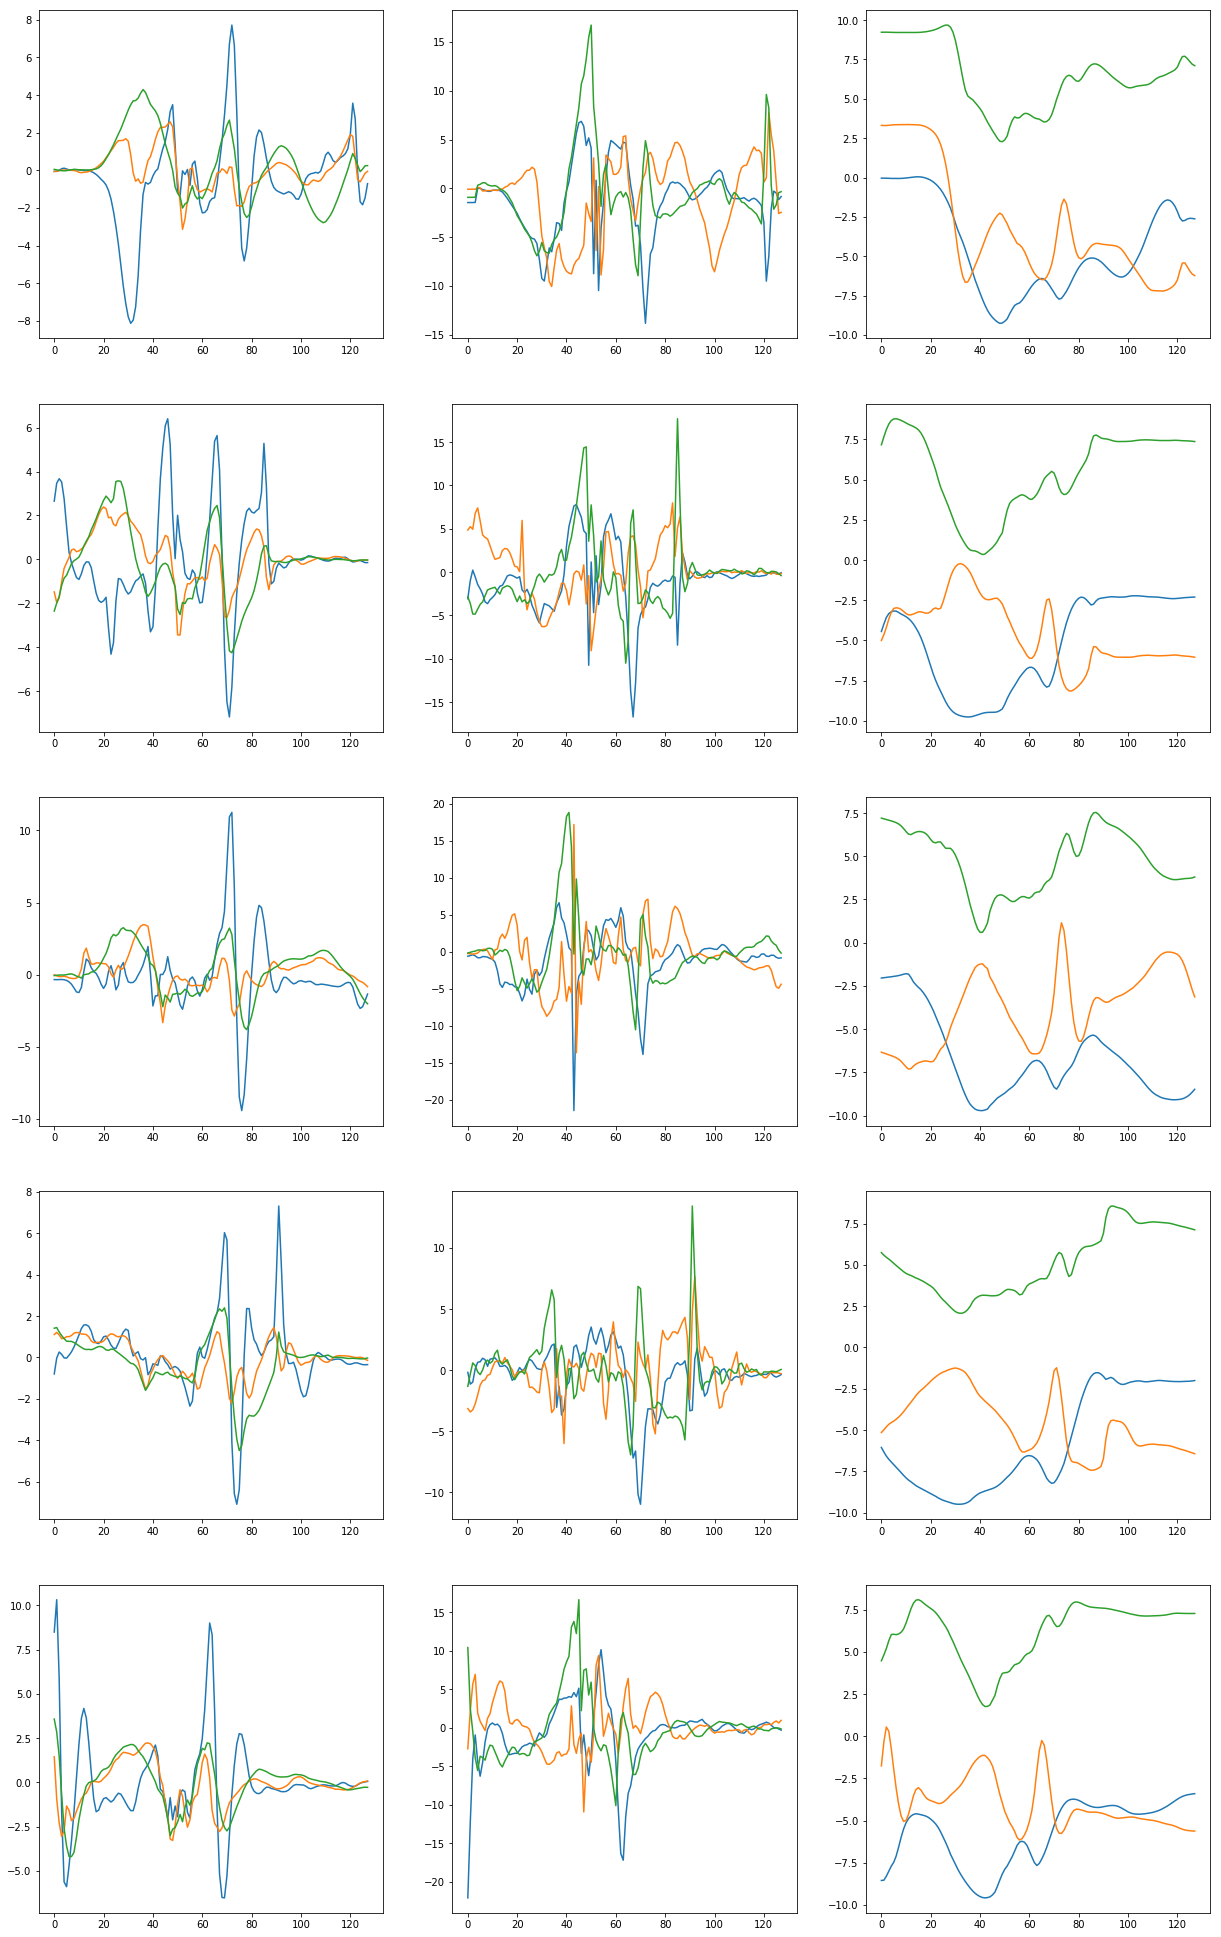

In [363]:
num_plt=5
fig=plt.figure(figsize=(21,35))
indices = [i for i, x in enumerate(y_kmeans) if x == 0]
print('num of indices:'+str(len(indices)))
for i in range(num_plt):
    ran_i=random.choice(indices)
    print(ran_i)
    plt.subplot(num_plt,3,i*3+1)
    plot(gyro_data[ran_i])
    plt.subplot(num_plt,3,i*3+2)
    plot(linearAcc_data[ran_i])
    plt.subplot(num_plt,3,i*3+3)
    plot(gravity_data[ran_i])



In [28]:
y_kmeans=kmean.predict(full_LV[:,:])

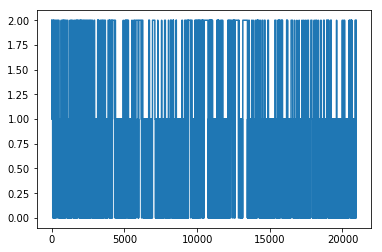

In [29]:
plot(y_kmeans)

In [60]:
y_kmeans=np.append(np.zeros((128,1)),y_kmeans)

In [9]:
y_kmeans.shape

(20941,)

In [8]:
np.savetxt('./kmeans_vae.csv',y_kmeans)

In [365]:
gyro_data[0].shape

(128, 3)

In [26]:
data_raw=np.load('./watch_4_25_raw.npy')

In [27]:
data_raw.shape

(2863, 13)

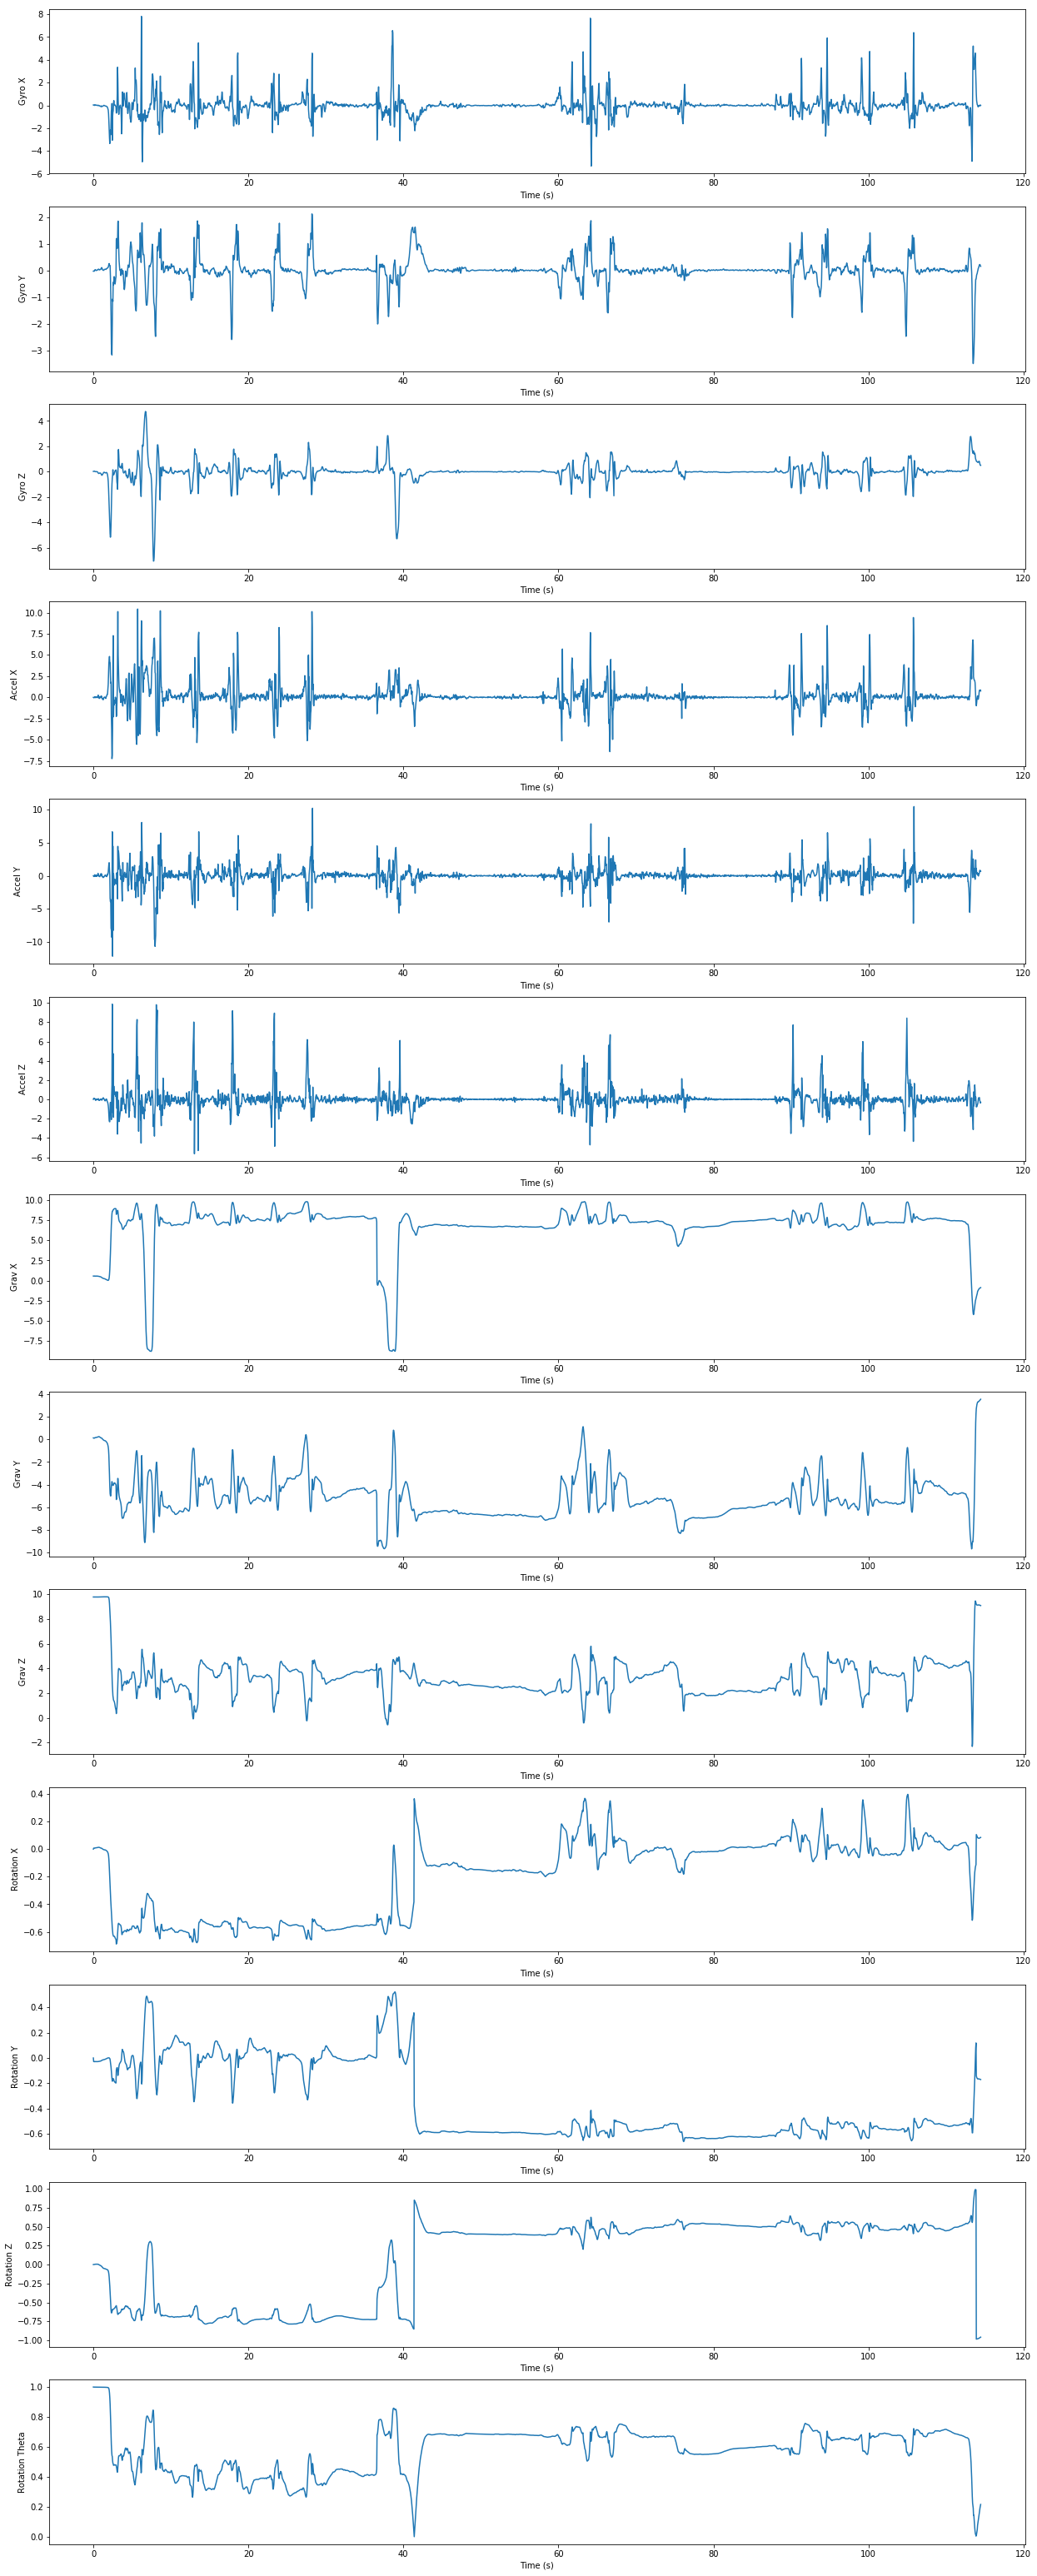

In [36]:
ylabel=['Gyro X','Gyro Y','Gyro Z','Accel X','Accel Y','Accel Z','Grav X','Grav Y','Grav Z','Rotation X','Rotation Y','Rotation Z','Rotation Theta']
fig=plt.figure(figsize=(21,7*n_clusters))
x = np.arange(0,len(data_raw)/25,0.04)
for i in range(data_raw.shape[-1]):
    plt.subplot(13,1,i+1)
    plt.ylabel(ylabel[i])
    plt.xlabel('Time (s)')
    plot(x,data_raw[:,i])
plt.savefig('image.png')